In [1]:
# Uncomment and install networkx, matplotlib if you want visualization
import networkx as nx
import matplotlib.pyplot as plt

def draw_lattice(all_itemsets, lattice_supports):
    G = nx.DiGraph()
    for itemset in all_itemsets:
        G.add_node(' '.join(sorted(itemset)))
        for parent in all_itemsets:
            if itemset != parent and itemset.issubset(parent) and len(parent) == len(itemset) + 1:
                G.add_edge(' '.join(sorted(parent)), ' '.join(sorted(itemset)))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=8)
    plt.title("Lattice of All Itemsets")
    for node in G.nodes():
        support = lattice_supports[frozenset(node.split())] if node else 0
        plt.text(pos[node][0], pos[node][1] - 0.1, f"sup: {support}", fontsize=6)
    plt.show()

# Call in main after generating lattice: draw_lattice(all_itemsets, lattice_supports)

In [2]:
import sys
from collections import defaultdict
import math

def find_frequent_1_itemsets(transactions, min_support_count):
    item_counts = defaultdict(int)
    for transaction in transactions:
        for item in transaction:
            item_counts[item]+=1
    frequent_items ={frozenset([item]):count for item,count in item_counts.items() if count>=min_support_count}
    return frequent_items

def generate_candidates(prev_frequent, k):
    candidates= set()
    prev_items= list(prev_frequent.keys())
    for i in range(len(prev_items)):
        for j in range(i+1, len(prev_items)):
            set1= prev_items[i]
            set2 =prev_items[j]
            union =set1|set2
            if len(union)== k:
                candidates.add(union)
    return candidates

def count_supports(candidates,transactions):
    supports =defaultdict(int)
    for transaction in transactions:
        for candidate in candidates:
            if candidate.issubset(transaction):
                supports[candidate] +=1
    return supports



In [5]:
import sys
from collections import defaultdict
import math
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

def find_frequent_1_itemsets(transactions, min_support_count):
    item_counts = defaultdict(int)
    for transaction in transactions:
        for item in transaction:
            item_counts[item] += 1
    frequent_items = {frozenset([item]): count for item, count in item_counts.items() if count >= min_support_count}
    return frequent_items

def generate_candidates(prev_frequent, k):
    candidates = set()
    prev_items = list(prev_frequent.keys())
    for i in range(len(prev_items)):
        for j in range(i + 1, len(prev_items)):
            set1 = prev_items[i]
            set2 = prev_items[j]
            union = set1 | set2
            if len(union) == k:
                candidates.add(union)
    return candidates

def count_supports(candidates, transactions):
    supports = defaultdict(int)
    for transaction in transactions:
        for candidate in candidates:
            if candidate.issubset(transaction):
                supports[candidate] += 1
    return supports

def generate_full_lattice(transactions):
    all_items = set()
    for transaction in transactions:
        all_items.update(transaction)
    
    all_itemsets = []
    for r in range(len(all_items) + 1):
        for combo in combinations(all_items, r):
            all_itemsets.append(frozenset(combo))
    
    lattice_supports = defaultdict(int)
    for transaction in transactions:
        for itemset in all_itemsets:
            if itemset.issubset(transaction):
                lattice_supports[itemset] += 1
    
    return all_itemsets, lattice_supports

def draw_lattice(all_itemsets, lattice_supports):
    G = nx.DiGraph()
    total_transactions = len(transactions)  # Assume transactions is in global scope or pass it
    for itemset in all_itemsets:
        itemset_str = ' '.join(sorted(itemset)) if itemset else '{}'
        support = lattice_supports[itemset]
        frequency = (support / total_transactions) * 100 if total_transactions > 0 else 0
        label = f"{itemset_str}\n(support: {support}, {frequency:.2f}%)"
        G.add_node(itemset_str, label=label)
        for parent in all_itemsets:
            parent_str = ' '.join(sorted(parent)) if parent else '{}'
            if itemset != parent and itemset.issubset(parent) and len(parent) == len(itemset) + 1:
                G.add_edge(parent_str, itemset_str)
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_color='lightgreen', node_size=2000, font_size=8, arrows=True)
    plt.title("Lattice of All Itemsets")
    plt.axis('off')
    plt.show()

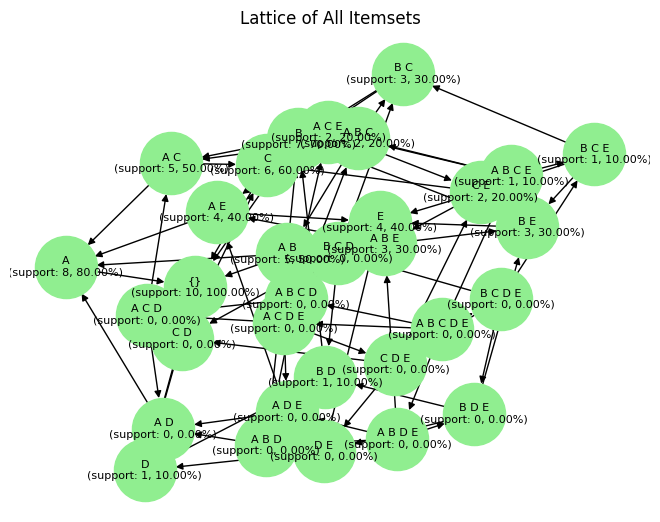